In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np

# FAVOURITE BOOKS BASED ON DEPARTMENTS
<p> In our library there are vast kinds of books with many categories.In this analysis we are trying to convey the idea about the books which are taken the most according to department and time.</p>




## 1. Favourite book (all books in library)

<p>First, let us take  count of books  available in library. There could be a reason why this  books are abundant in library. Here, we consider copies of same book as separate books.</p>



In [2]:
# Variables that can be manipulated by widgets
rank = 10
chart_type = "bar"
start_dt = "2016-05-06"
end_dt = "2022-06-08"
depts = ['GENERAL', 'CS', 'IT', 'EC', 'ME', 'MECHANICAL',
         'INFORMATION TECHNOLOGY', 'COMPUTER SCIENCE', 'M Tech CS CL',
         'EEE', 'ELECTRONICS AND COMMUNICATION', 'Ph.D', 'PHYSICS', 'CE',
         'ECONOMICS', 'ELECTRICAL', 'M Tech ME ROB', 'CENTRAL LIBRARY',
         'CIVIL', 'MATHEMATICS', 'CHEMISTRY']


In [3]:
#dataframe of all books in library
df2 = pd.read_csv('src/clean1_bookDetails.csv')

In [4]:
# counting number of books
df3 = df2['title'].value_counts().sort_values(ascending=False).head(int(rank))


In [5]:
# function to add lables above bar plot
def addlabels(x, y):
	for i in range(len(x)):
		plt.text(i, y[i], y[i], ha='center')

In [6]:
# Creating  two lists for plotting graph
def series_to_list(df, rank=100):
    """
    Convert pandas series object to two lists x and y. 
    This makes plotting graph with matplotlib easier.
    We only consider maximum of 100 values for plotting graph.
    """
    count = 0
    x , y = [], []
    for i, j in df.iteritems():
        x.append(i)
        y.append(j)
        count += 1
        if count == rank:
            break
    return (x, y)

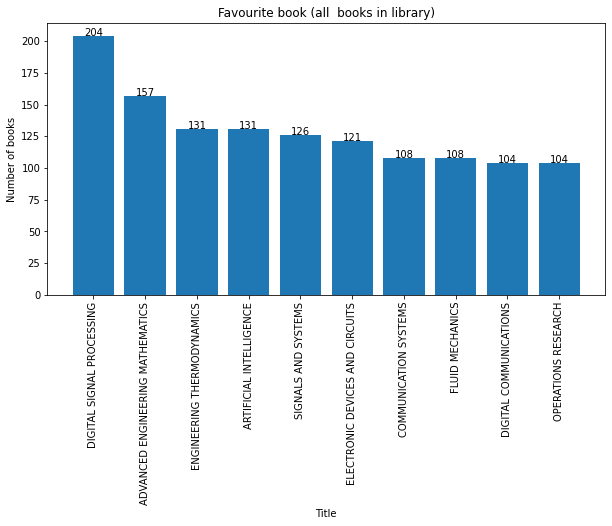

In [7]:
# Creating  two lists for plotting graph
x, y = series_to_list(df3)

if (chart_type == "bar"):
    plt.figure(figsize=(10, 5))
    plt.bar(x, y)
    # Adding count above bar
    addlabels(x, y)
    # vertically align x axis values
    plt.xticks(range(len(x)), x, rotation='vertical')
    plt.title(f"Favourite book (all  books in library)")
    plt.xlabel("Title")
    plt.ylabel("Number of books")
    plt.show()
elif(chart_type == "pie"):
    fig = plt.figure(figsize=(10, 5))
    # use autopct to show percentage on diagram
    plt.pie(y, labels=x, autopct='%1.1f%%')
    plt.title(f"Favourite author (all books in library)")
    plt.show()


In [8]:
df3

DIGITAL SIGNAL PROCESSING           204
ADVANCED ENGINEERING MATHEMATICS    157
ENGINEERING THERMODYNAMICS          131
ARTIFICIAL INTELLIGENCE             131
SIGNALS AND SYSTEMS                 126
ELECTRONIC DEVICES AND CIRCUITS     121
COMMUNICATION SYSTEMS               108
FLUID MECHANICS                     108
DIGITAL COMMUNICATIONS              104
OPERATIONS RESEARCH                 104
Name: title, dtype: int64

## Favourite Book (from book issue)

<p> Now lets find which  are the popular books based on book issue details. We can find popular books of each department by selecting department form left panel.

Since this data is generated inside an academic library, it has strong conection with syllabus and curriculum. Because generally, most of the users (who are students) choose books related to what they study in classrooms. So change in syllabus can change 'favourites' of books.

That is why the time is important. From the left panel you can select time period. Based on time period and departments we first filter our dataset. Then we plot title v/s number of issues using same method discussed earlier. </p>

<ul>While passing arguments please consider the following tips; </ul>

<ul>
    <li> Start date must be lower than end date.</li>
   <li>  Start date must be greater than 2016-05-06.</li>
   <li>  End date must be lower than 2022-06-08.</li>
    <li> Pass dates only in YYYY-MM-DD format (eg: 2022-06-05).</li>
   <li>  Select atleast one department.</li>
    <li> Adjust the rank variable to display more results.</li>
 </ul>

In [9]:
#selecting dataframe fromm bookissue
df = pd.read_csv("src/bkIssue_libUser_bkDetails.csv",index_col=0)


In [10]:
df.drop (['acc_no','sl_no','checked_in(Y/N)','book_issued(Y/N)', 'sex'], 1, inplace=True)

/tmp/ipykernel_10844/1491900254.py:1: FutureWarning: In a future version of pandas all arguments of DataFrame.drop except for the argument 'labels' will be keyword-only.
  df.drop (['acc_no','sl_no','checked_in(Y/N)','book_issued(Y/N)', 'sex'], 1, inplace=True)


In [11]:
df['issue_date'] = pd.to_datetime(df['issue_date'],dayfirst=True)

In [12]:
df=df.dropna()


In [13]:
#Counting number of books
df1 = df['title'].value_counts().sort_values(ascending=False).head(int(rank))

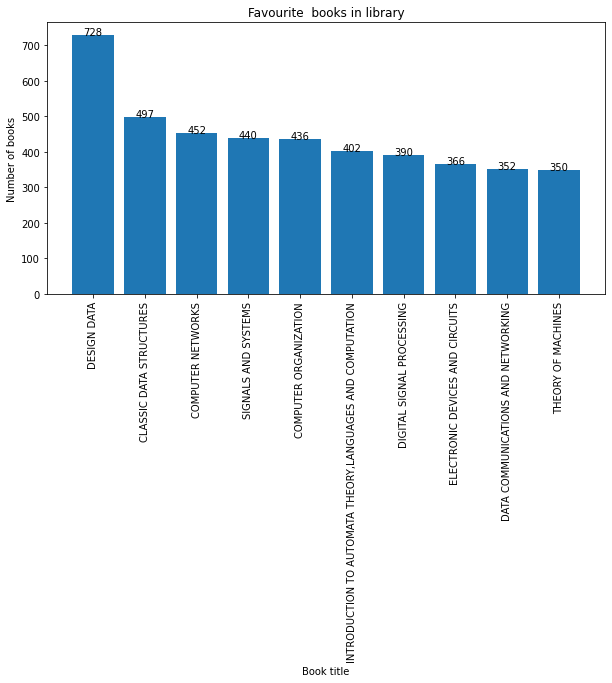

In [14]:
x, y = series_to_list(df1)

if (chart_type == "bar"):
    plt.figure(figsize=(10, 5))
    plt.bar(x, y)
    # Adding count above bar
    addlabels(x, y)
    plt.xticks(range(len(x)), x, rotation='vertical') # vertically align x axis values
    plt.title(f"Favourite  books in library")
    plt.xlabel("Book title")
    plt.ylabel("Number of books")
    plt.show()
elif(chart_type == "pie"):
    fig = plt.figure(figsize=(10, 5))
    # use autopct to show percentage on diagram
    plt.pie(y, labels=x, autopct='%1.1f%%')
    plt.title(f"Favourite  books in library")
    plt.show()

In [15]:
df1

DESIGN DATA                                                  728
CLASSIC DATA STRUCTURES                                      497
COMPUTER NETWORKS                                            452
SIGNALS AND SYSTEMS                                          440
COMPUTER ORGANIZATION                                        436
INTRODUCTION TO AUTOMATA THEORY,LANGUAGES AND COMPUTATION    402
DIGITAL SIGNAL PROCESSING                                    390
ELECTRONIC DEVICES AND CIRCUITS                              366
DATA COMMUNICATIONS AND NETWORKING                           352
THEORY OF MACHINES                                           350
Name: title, dtype: int64